In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pycaret
!pip install kmodes

In [ ]:
import pandas as pd
from pycaret.classification import *
from kmodes.kprototypes import KPrototypes

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/DCC/dacon_data/card_data/train.csv', index_col=0)
test_data = pd.read_csv('/content/drive/MyDrive/DCC/dacon_data/card_data/test.csv', index_col=0)
submission = pd.read_csv('/content/drive/MyDrive/DCC/dacon_data/card_data/sample_submission.csv', index_col=0)

In [ ]:
## origin data
train_data

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0


In [ ]:
# Na -> unknown
train_data.fillna("unknown", inplace=True)

In [ ]:
## 범주형 변수 설정
categorical_features_idx = [0,1,2,5,6,7,8,11,12,13,14,15]

In [ ]:
mark_array=train_data.values

In [ ]:
# k-Modes clustering(categorical data도 cluster 가능)
## 연속형 변수가 아닌 범주형 변수로 클러스터링 가능
## 4 cluster
kproto = KPrototypes(n_clusters=4, verbose=2, max_iter=20).fit(mark_array, categorical=categorical_features_idx)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 8748, ncost: 126583093208144.84
Run: 1, iteration: 2/20, moves: 4858, ncost: 106289230293175.23
Run: 1, iteration: 3/20, moves: 3741, ncost: 97081122154773.58
Run: 1, iteration: 4/20, moves: 2753, ncost: 91195324462935.55
Run: 1, iteration: 5/20, moves: 777, ncost: 90787317920515.52
Run: 1, iteration: 6/20, moves: 40, ncost: 90786483485411.81
Run: 1, iteration: 7/20, moves: 0, ncost: 90786483485411.81
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 5047, ncost: 100092509809162.62
Run: 2, iteration: 2/20, moves: 2261, ncost: 92545959975375.75
Run: 2, iteration: 3/20, moves: 1651, ncost: 90803492464605.4
Run: 2, iteration: 4/20, moves: 150, ncost: 90786483485411.81
Run: 2, iteration: 5/20, moves: 0, nco

In [ ]:
# cluster centroids
print(kproto.cluster_centroids_)

[['0.5078485687903971' '507333.51523545705' '-15786.08864265928'
  '2662.0886426592797' '2.3130193905817173' '-26.565096952908586'
  '1.518005540166205' 'M' 'Y' 'Y' 'Working' 'Higher education' 'Married'
  'House / apartment' '1' '0' '0' '0' 'Managers']
 ['0.04748982360922659' '147787.0013568521' '-21772.630483943918'
  '365243.0' '1.7415196743554953' '-25.897557666214382'
  '1.513116236996834' 'F' 'N' 'Y' 'Pensioner'
  'Secondary / secondary special' 'Married' 'House / apartment' '1' '0'
  '0' '0' 'unknown']
 ['0.4863214149382873' '255438.23132714085' '-14912.981168087543'
  '-2717.1627433515714' '2.2496500827077237' '-26.647665097340628'
  '1.5313653136531364' 'F' 'Y' 'Y' 'Working'
  'Secondary / secondary special' 'Married' 'House / apartment' '1' '0'
  '0' '0' 'Laborers']
 ['0.5162300465897808' '133286.7441762774' '-14635.775376155198'
  '-2585.4630718704652' '2.3093255938287633' '-25.84823951729932'
  '1.5147788894829297' 'F' 'N' 'Y' 'Working'
  'Secondary / secondary special' 'Ma

In [ ]:
# prediction
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)

In [ ]:
train_data['cluster'] = list(clusters)

In [ ]:
train_data[train_data['cluster']==1].head(10)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,cluster
index,,,,,,,,,,,,,,,,,,,,
14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,unknown,1.0,-41.0,2.0,1
18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,unknown,2.0,-37.0,2.0,1
21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21253,365243,1,0,1,0,unknown,2.0,-7.0,2.0,1
24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22361,365243,1,0,1,0,unknown,1.0,-5.0,2.0,1
46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21100,365243,1,0,1,0,unknown,1.0,-24.0,2.0,1
48,F,N,Y,0,99000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23585,365243,1,0,0,0,unknown,2.0,-4.0,2.0,1
52,F,N,Y,0,54000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24044,365243,1,0,1,0,unknown,2.0,-37.0,2.0,1
58,F,N,Y,0,144000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23334,365243,1,0,0,0,unknown,2.0,-23.0,2.0,1
59,F,N,Y,0,360000.0,Pensioner,Higher education,Married,House / apartment,-22985,365243,1,0,1,0,unknown,2.0,-25.0,2.0,1


In [ ]:
## cluster feature add
train_data

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,cluster
index,,,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,unknown,2.0,-6.0,1.0,2
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,2
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,2
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0,2
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,unknown,2.0,-47.0,2.0,3
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0,2


In [ ]:
# pycaret을 이용한 AutoML 환경 설정/ traget=credit
model = setup(train_data, target = 'credit', use_gpu=True)

,Description,Value
0,session_id,1843
1,Target,credit
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(26457, 20)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
## 모델 비교(변수 포함, 클러스터 변수 포함)

compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7039,0.7530,0.5420,0.6826,0.6876,0.3777,0.3842,4.587
lightgbm,Light Gradient Boosting Machine,0.6982,0.7057,0.4241,0.6759,0.6212,0.2369,0.3161,0.746
gbc,Gradient Boosting Classifier,0.6949,0.6585,0.4125,0.6649,0.6106,0.2160,0.3070,9.208
ada,Ada Boost Classifier,0.6930,0.6299,0.4067,0.6554,0.6047,0.2039,0.3024,0.927
et,Extra Trees Classifier,0.6726,0.7129,0.5197,0.6523,0.6584,0.3195,0.3236,5.830
lda,Linear Discriminant Analysis,0.6456,0.6089,0.3402,0.5386,0.5160,0.0203,0.0662,0.297
nb,Naive Bayes,0.6452,0.6095,0.3363,0.5677,0.5086,0.0096,0.0568,0.046
ridge,Ridge Classifier,0.6443,0.0000,0.3362,0.5413,0.5087,0.0086,0.0444,0.071
lr,Logistic Regression,0.6431,0.5829,0.3333,0.4136,0.5034,0.0000,0.0000,0.673
knn,K Neighbors Classifier,0.6143,0.6543,0.4571,0.5909,0.5997,0.2040,0.2062,0.777


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1843, verbose=0,
                       warm_start=False)

In [ ]:
# clustering한 feature 제외

# 3,4,9,10,16 열만 포함 
train_data2 = train_data[["child_num",	"income_total",  "DAYS_BIRTH",	"DAYS_EMPLOYED","credit", "cluster"]]

In [ ]:
model = setup(train_data2, target = 'credit', use_gpu=True)

,Description,Value
0,session_id,7741
1,Target,credit
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(26457, 6)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
## 모델 비교 (변수 제거, 클러스터 변수 포함)
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6528,0.7039,0.5224,0.6375,0.6429,0.2974,0.2995,3.506
lightgbm,Light Gradient Boosting Machine,0.6434,0.6226,0.3559,0.6087,0.5280,0.0493,0.1043,0.544
gbc,Gradient Boosting Classifier,0.6410,0.5730,0.3405,0.6305,0.5083,0.0177,0.0675,4.820
lr,Logistic Regression,0.6382,0.5205,0.3333,0.4072,0.4972,0.0000,0.0000,0.348
nb,Naive Bayes,0.6382,0.5203,0.3333,0.4072,0.4972,0.0000,0.0000,0.033
lda,Linear Discriminant Analysis,0.6382,0.5229,0.3335,0.4553,0.4974,0.0003,0.0050,0.117
et,Extra Trees Classifier,0.6382,0.7056,0.5387,0.6373,0.6376,0.3026,0.3027,3.721
ridge,Ridge Classifier,0.6381,0.0000,0.3333,0.4072,0.4972,-0.0001,-0.0014,0.044
ada,Ada Boost Classifier,0.6376,0.5353,0.3334,0.4473,0.4977,0.0004,0.0039,0.611
dt,Decision Tree Classifier,0.6268,0.6892,0.5394,0.6344,0.6302,0.2966,0.2970,0.094


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=7741, verbose=0,
                       warm_start=False)

In [ ]:
## 클러스터 변수 제외
train_data3 = train_data.loc[:, [col for col in train_data.columns if col != "cluster"]]

In [ ]:
model = setup(train_data3, target = 'credit', use_gpu=True)

,Description,Value
0,session_id,3792
1,Target,credit
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(26457, 19)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
## 모델 비교 (변수 전체, 클러스터 변수 미포함)
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6972,0.7480,0.5369,0.6751,0.6807,0.3701,0.3762,4.707
lightgbm,Light Gradient Boosting Machine,0.6972,0.7116,0.4300,0.6851,0.6226,0.2454,0.3249,0.799
gbc,Gradient Boosting Classifier,0.6905,0.6561,0.4115,0.6739,0.6056,0.2146,0.3037,9.995
ada,Ada Boost Classifier,0.6882,0.6255,0.4050,0.6280,0.5988,0.2005,0.2982,0.970
et,Extra Trees Classifier,0.6702,0.7086,0.5190,0.6495,0.6556,0.3192,0.3236,5.827
nb,Naive Bayes,0.6393,0.6096,0.3346,0.5442,0.4999,0.0046,0.0366,0.045
lda,Linear Discriminant Analysis,0.6389,0.6093,0.3371,0.5180,0.5053,0.0113,0.0432,0.289
ridge,Ridge Classifier,0.6388,0.0000,0.3353,0.5323,0.5016,0.0058,0.0330,0.074
lr,Logistic Regression,0.6384,0.5380,0.3333,0.4076,0.4975,0.0000,0.0000,0.516
dt,Decision Tree Classifier,0.6121,0.6459,0.4984,0.6219,0.6167,0.2699,0.2702,0.249


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=3792, verbose=0,
                       warm_start=False)

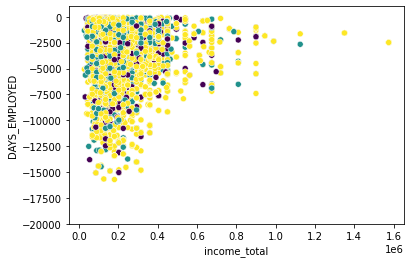

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.scatterplot("income_total","DAYS_EMPLOYED",c=money['credit'],data=money,legend=True)
plt.ylim(-20000,1000)
plt.show()
